# 1. Import Library

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# 資料預處理

In [0]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [0]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [0]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [0]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(128, activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
model.add(Dense(10,activation='softmax'))

In [123]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               225920    
__________

# 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [125]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 3s - loss: 0.4911 - acc: 0.8470 - val_loss: 0.0962 - val_acc: 0.9726
Epoch 2/20
 - 3s - loss: 0.1398 - acc: 0.9592 - val_loss: 0.0640 - val_acc: 0.9808
Epoch 3/20
 - 3s - loss: 0.1022 - acc: 0.9699 - val_loss: 0.0508 - val_acc: 0.9844
Epoch 4/20
 - 3s - loss: 0.0837 - acc: 0.9759 - val_loss: 0.0461 - val_acc: 0.9858
Epoch 5/20
 - 3s - loss: 0.0717 - acc: 0.9776 - val_loss: 0.0394 - val_acc: 0.9875
Epoch 6/20
 - 3s - loss: 0.0645 - acc: 0.9804 - val_loss: 0.0384 - val_acc: 0.9889
Epoch 7/20
 - 3s - loss: 0.0565 - acc: 0.9827 - val_loss: 0.0413 - val_acc: 0.9881
Epoch 8/20
 - 3s - loss: 0.0518 - acc: 0.9839 - val_loss: 0.0332 - val_acc: 0.9899
Epoch 9/20
 - 3s - loss: 0.0455 - acc: 0.9863 - val_loss: 0.0330 - val_acc: 0.9904
Epoch 10/20
 - 3s - loss: 0.0427 - acc: 0.9870 - val_loss: 0.0343 - val_acc: 0.9898
Epoch 11/20
 - 3s - loss: 0.0416 - acc: 0.9874 - val_loss: 0.0326 - val_acc: 0.9908
Epoch 12/20
 - 3s - loss: 0.0370 - 

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

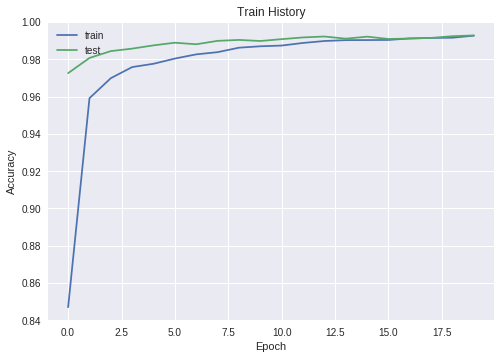

In [127]:
show_train_history('acc','val_acc')

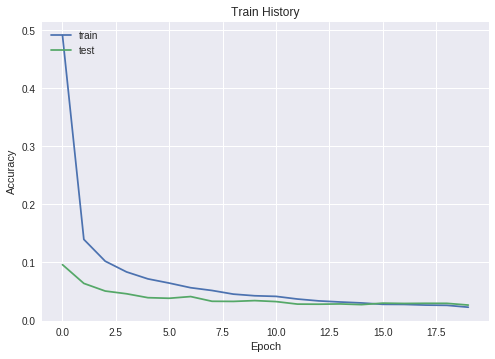

In [128]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [129]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 1s 88us/step


0.9939

# 預測結果

In [0]:
prediction=model.predict_classes(x_Test4D_normalize)

In [131]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

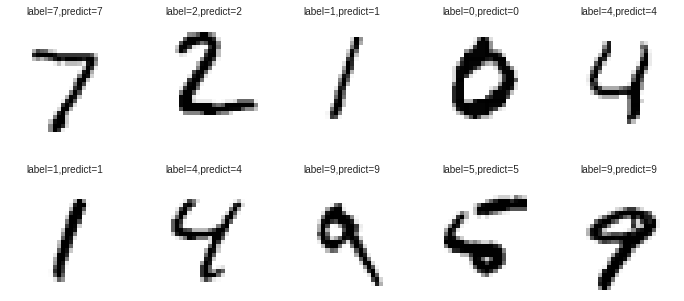

In [133]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [134]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,0,0,1,1
1,0,1131,1,0,0,0,0,1,2,0
2,1,0,1028,0,0,0,0,2,1,0
3,0,0,0,1004,0,4,0,0,2,0
4,0,0,0,0,977,0,1,0,2,2
5,1,0,0,4,0,885,1,0,0,1
6,3,2,0,0,3,1,948,0,1,0
7,0,1,3,0,0,0,0,1020,1,3
8,1,0,1,1,0,2,0,1,966,2


In [0]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [136]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2597,5,3
2810,5,3
5937,5,3


In [137]:
ls

models/  sample_data/


In [138]:
mkdir models

mkdir: cannot create directory ‘models’: File exists


In [139]:
ls

models/  sample_data/


In [0]:
model.save("models/keras_cnn.h5")

In [141]:
!ls models

keras_cnn.h5


In [0]:
from google.colab import files

In [0]:
files.download("models/keras_cnn.h5")

In [144]:
files.upload()

{}